In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import fft

In [39]:
df = pd.read_csv("4_Chest_sweater.txt", sep = '\t')
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,100,1555414552,687.836,380.823,580.354,-7.926829,8.048780,0.975610,-592,122,-113,0.788006,0.002899,-0.432874,-0.437788
1,5,100,1555414552,-812.703,-108.946,726.876,-11.707320,-81.829270,8.780488,125,60,-128,0.183978,-0.428877,0.002594,0.884426
2,5,100,1555414552,-812.520,-108.824,733.952,-37.073170,-145.487800,14.756100,123,59,-136,0.128994,-0.427229,0.000702,0.894894
3,5,100,1555414552,-787.144,-45.628,616.954,-56.341460,-174.634200,23.048780,118,58,-145,0.113618,-0.421033,-0.001770,0.899899
4,5,100,1555414552,-800.259,-137.433,411.689,-1.097561,37.073170,1.341463,113,57,-157,0.107202,-0.424787,-0.001251,0.898923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,5,100,1555415471,-890.722,-81.008,446.764,-2.682927,2.926829,0.365854,144,47,-50,0.017279,0.534410,0.040437,-0.844081
14934,5,100,1555415471,-885.964,-76.006,459.025,-3.902439,3.292683,0.365854,146,45,-51,0.016416,0.535050,0.041231,-0.843654
14935,5,100,1555415471,-879.681,-77.714,475.068,-3.048780,2.804878,0.365854,144,46,-54,0.015920,0.534349,0.041780,-0.844081
14936,5,100,1555415471,-894.992,-76.311,502.701,0.121951,1.463415,0.609756,144,45,-53,0.015192,0.531663,0.041749,-0.845790


In [40]:
f = df['Log Freq'][0]

In [41]:
df['time'] = np.arange(df.shape[0])/f

<AxesSubplot:xlabel='time'>

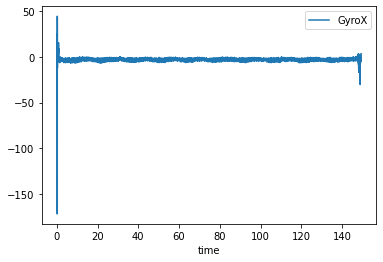

In [42]:
df.plot('time', 'GyroX')

<AxesSubplot:xlabel='time'>

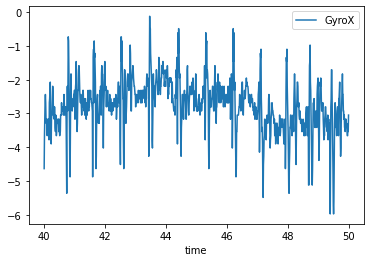

In [73]:
df.loc[(df['time'] > 40) & (df['time'] < 50)].plot('time', 'GyroX')

[1.36689448 1.43357226 1.35022504]


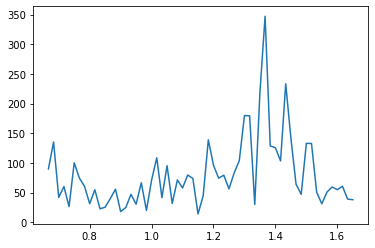

In [74]:
sign = df['GyroX'].loc[(df['time'] > 40) & (df['time'] < 100)].values
tras_sign = fft.fft(sign-sign.mean())
freq = fft.fftfreq(sign.shape[0], d=1/f)
BPM_min = 40/60
BPM_max = 100/60
power = np.abs(tras_sign)
newfreq = freq[(freq > BPM_min) & (freq < BPM_max)]
newpower = power[(freq > BPM_min) & (freq < BPM_max)]
print(newfreq[np.argsort(newpower)][:-4:-1])
plt.plot(newfreq, newpower)
plt.show()

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


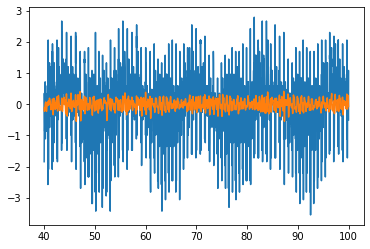

In [84]:
cut_sign = tras_sign.copy()
cut_sign[(freq < 0.66) | (freq > 5)] = 0
new_sign = fft.ifft(cut_sign)
plt.plot(df['time'].loc[(df['time'] > 40) & (df['time'] < 100)], sign-sign.mean())
plt.plot(df['time'].loc[(df['time'] > 40) & (df['time'] < 100)], new_sign)


[0.88348058 1.3002167  1.36689448]


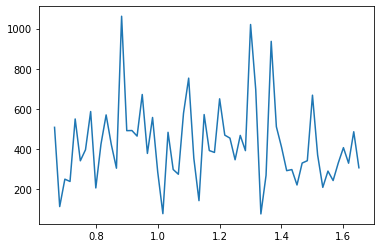

In [53]:
sign = df['AccX'].loc[(df['time'] > 40) & (df['time'] < 100)].values
tras_sign = fft.rfft(sign-sign.mean())
freq = fft.rfftfreq(sign.shape[0], d=1/f)
BPM_min = 40/60
BPM_max = 100/60
power = np.abs(tras_sign)
newfreq = freq[(freq > BPM_min) & (freq < BPM_max)]
newpower = power[(freq > BPM_min) & (freq < BPM_max)]
print(newfreq[np.argsort(newpower)][:-4:-1])
plt.plot(newfreq, newpower)
plt.show()

[1.40023337 1.3002167  1.21686948 1.36689448]


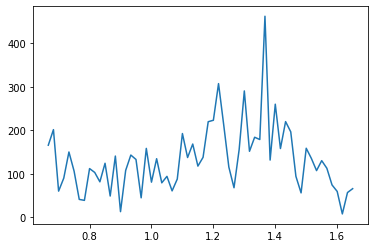

In [58]:
sign = df['GyroY'].loc[(df['time'] > 40) & (df['time'] < 100)].values
tras_sign = fft.fft(sign-sign.mean())
freq = fft.fftfreq(sign.shape[0], d=1/f)
BPM_min = 40/60
BPM_max = 100/60
power = np.abs(tras_sign)
newfreq = freq[(freq > BPM_min) & (freq < BPM_max)]
newpower = power[(freq > BPM_min) & (freq < BPM_max)]
print(newfreq[np.argsort(newpower)][-4:])
plt.plot(newfreq, newpower)
plt.show()

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(60.0, 70.0)

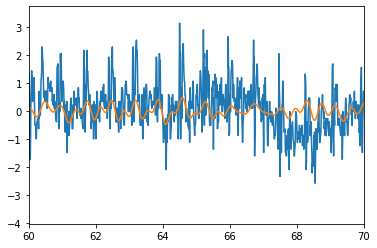

In [70]:
cut_sign = tras_sign.copy()
cut_sign[(freq < 0.5) | (freq > 3)] = 0
new_sign = fft.ifft(cut_sign)
plt.plot(df['time'].loc[(df['time'] > 40) & (df['time'] < 100)], sign-sign.mean())
plt.plot(df['time'].loc[(df['time'] > 40) & (df['time'] < 100)], new_sign)
plt.xlim(60, 70)

[1.3002167  1.43357226 1.35022504 1.36689448]


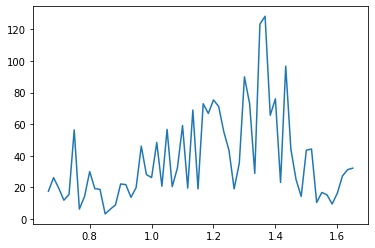

In [18]:
sign = df['GyroZ'].loc[(df['time'] > 40) & (df['time'] < 100)].values
tras_sign = fft.rfft(sign-sign.mean())
freq = fft.rfftfreq(sign.shape[0], d=1/f)
BPM_min = 40/60
BPM_max = 100/60
power = np.abs(tras_sign)
newfreq = freq[(freq > BPM_min) & (freq < BPM_max)]
newpower = power[(freq > BPM_min) & (freq < BPM_max)]
print(newfreq[np.argsort(newpower)][-4:])
plt.plot(newfreq, newpower)
plt.show()

[0.91681947 1.51691949 0.68344724 0.6667778 ]


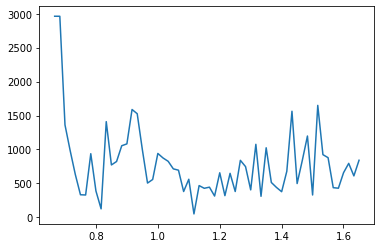

In [19]:
sign = df['AccZ'].loc[(df['time'] > 40) & (df['time'] < 100)].values
tras_sign = fft.rfft(sign-sign.mean())
freq = fft.rfftfreq(sign.shape[0], d=1/f)
BPM_min = 40/60
BPM_max = 100/60
power = np.abs(tras_sign)
newfreq = freq[(freq > BPM_min) & (freq < BPM_max)]
newpower = power[(freq > BPM_min) & (freq < BPM_max)]
print(newfreq[np.argsort(newpower)][-4:])
plt.plot(newfreq, newpower)
plt.show()

[0.68344724 1.4835806  0.6667778 ]


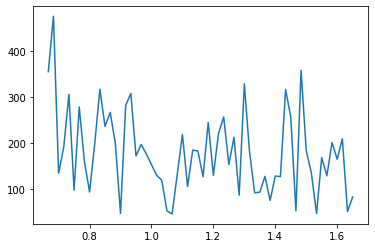

In [72]:
sign = df['MagnZ'].loc[(df['time'] > 40) & (df['time'] < 100)].values
tras_sign = fft.rfft(sign-sign.mean())
freq = fft.rfftfreq(sign.shape[0], d=1/f)
BPM_min = 40/60
BPM_max = 100/60
power = np.abs(tras_sign)
newfreq = freq[(freq > BPM_min) & (freq < BPM_max)]
newpower = power[(freq > BPM_min) & (freq < BPM_max)]
print(newfreq[np.argsort(newpower)][:-4:-1])
plt.plot(newfreq, newpower)
plt.show()

[0.95015836 1.43357226 0.6667778 ]


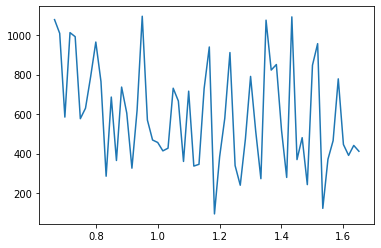

In [36]:
sign = df['AccY'].loc[(df['time'] > 40) & (df['time'] < 100)].values
tras_sign = fft.rfft(sign-sign.mean())
freq = fft.rfftfreq(sign.shape[0], d=1/f)
BPM_min = 40/60
BPM_max = 100/60
power = np.abs(tras_sign)
newfreq = freq[(freq > BPM_min) & (freq < BPM_max)]
newpower = power[(freq > BPM_min) & (freq < BPM_max)]
print(newfreq[np.argsort(newpower)][:-4:-1])
plt.plot(newfreq, newpower)
plt.show()